# Feature engineering to select Variables

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

In [17]:
boston = load_boston()

In [18]:
main=pd.DataFrame(boston.data,columns=boston.feature_names)

In [19]:
target=pd.DataFrame(boston.target,columns=['PRICE'])

In [20]:
df=pd.concat([main,target],axis=1)

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
df.shape

(506, 14)

# 1. Correlation Analaysis

In [23]:
cor=df.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


###### function to choose the correlated variables

In [24]:
def getcorr(data,threshold):
    value=[]
    variables=[]
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            value.append(data[index])
            variables.append(index)
    new=pd.DataFrame(data=value,index=variables,columns=["col"])
    return new
                    

In [25]:
threshold=0.5
z=getcorr(cor["PRICE"],threshold)
z

,col
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
PRICE,1.000000


###### Variables selected using Correlation analysis

In [26]:
correlated_data=df[z.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,PRICE
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


# 2. Plot Histograms and choose the correct variables

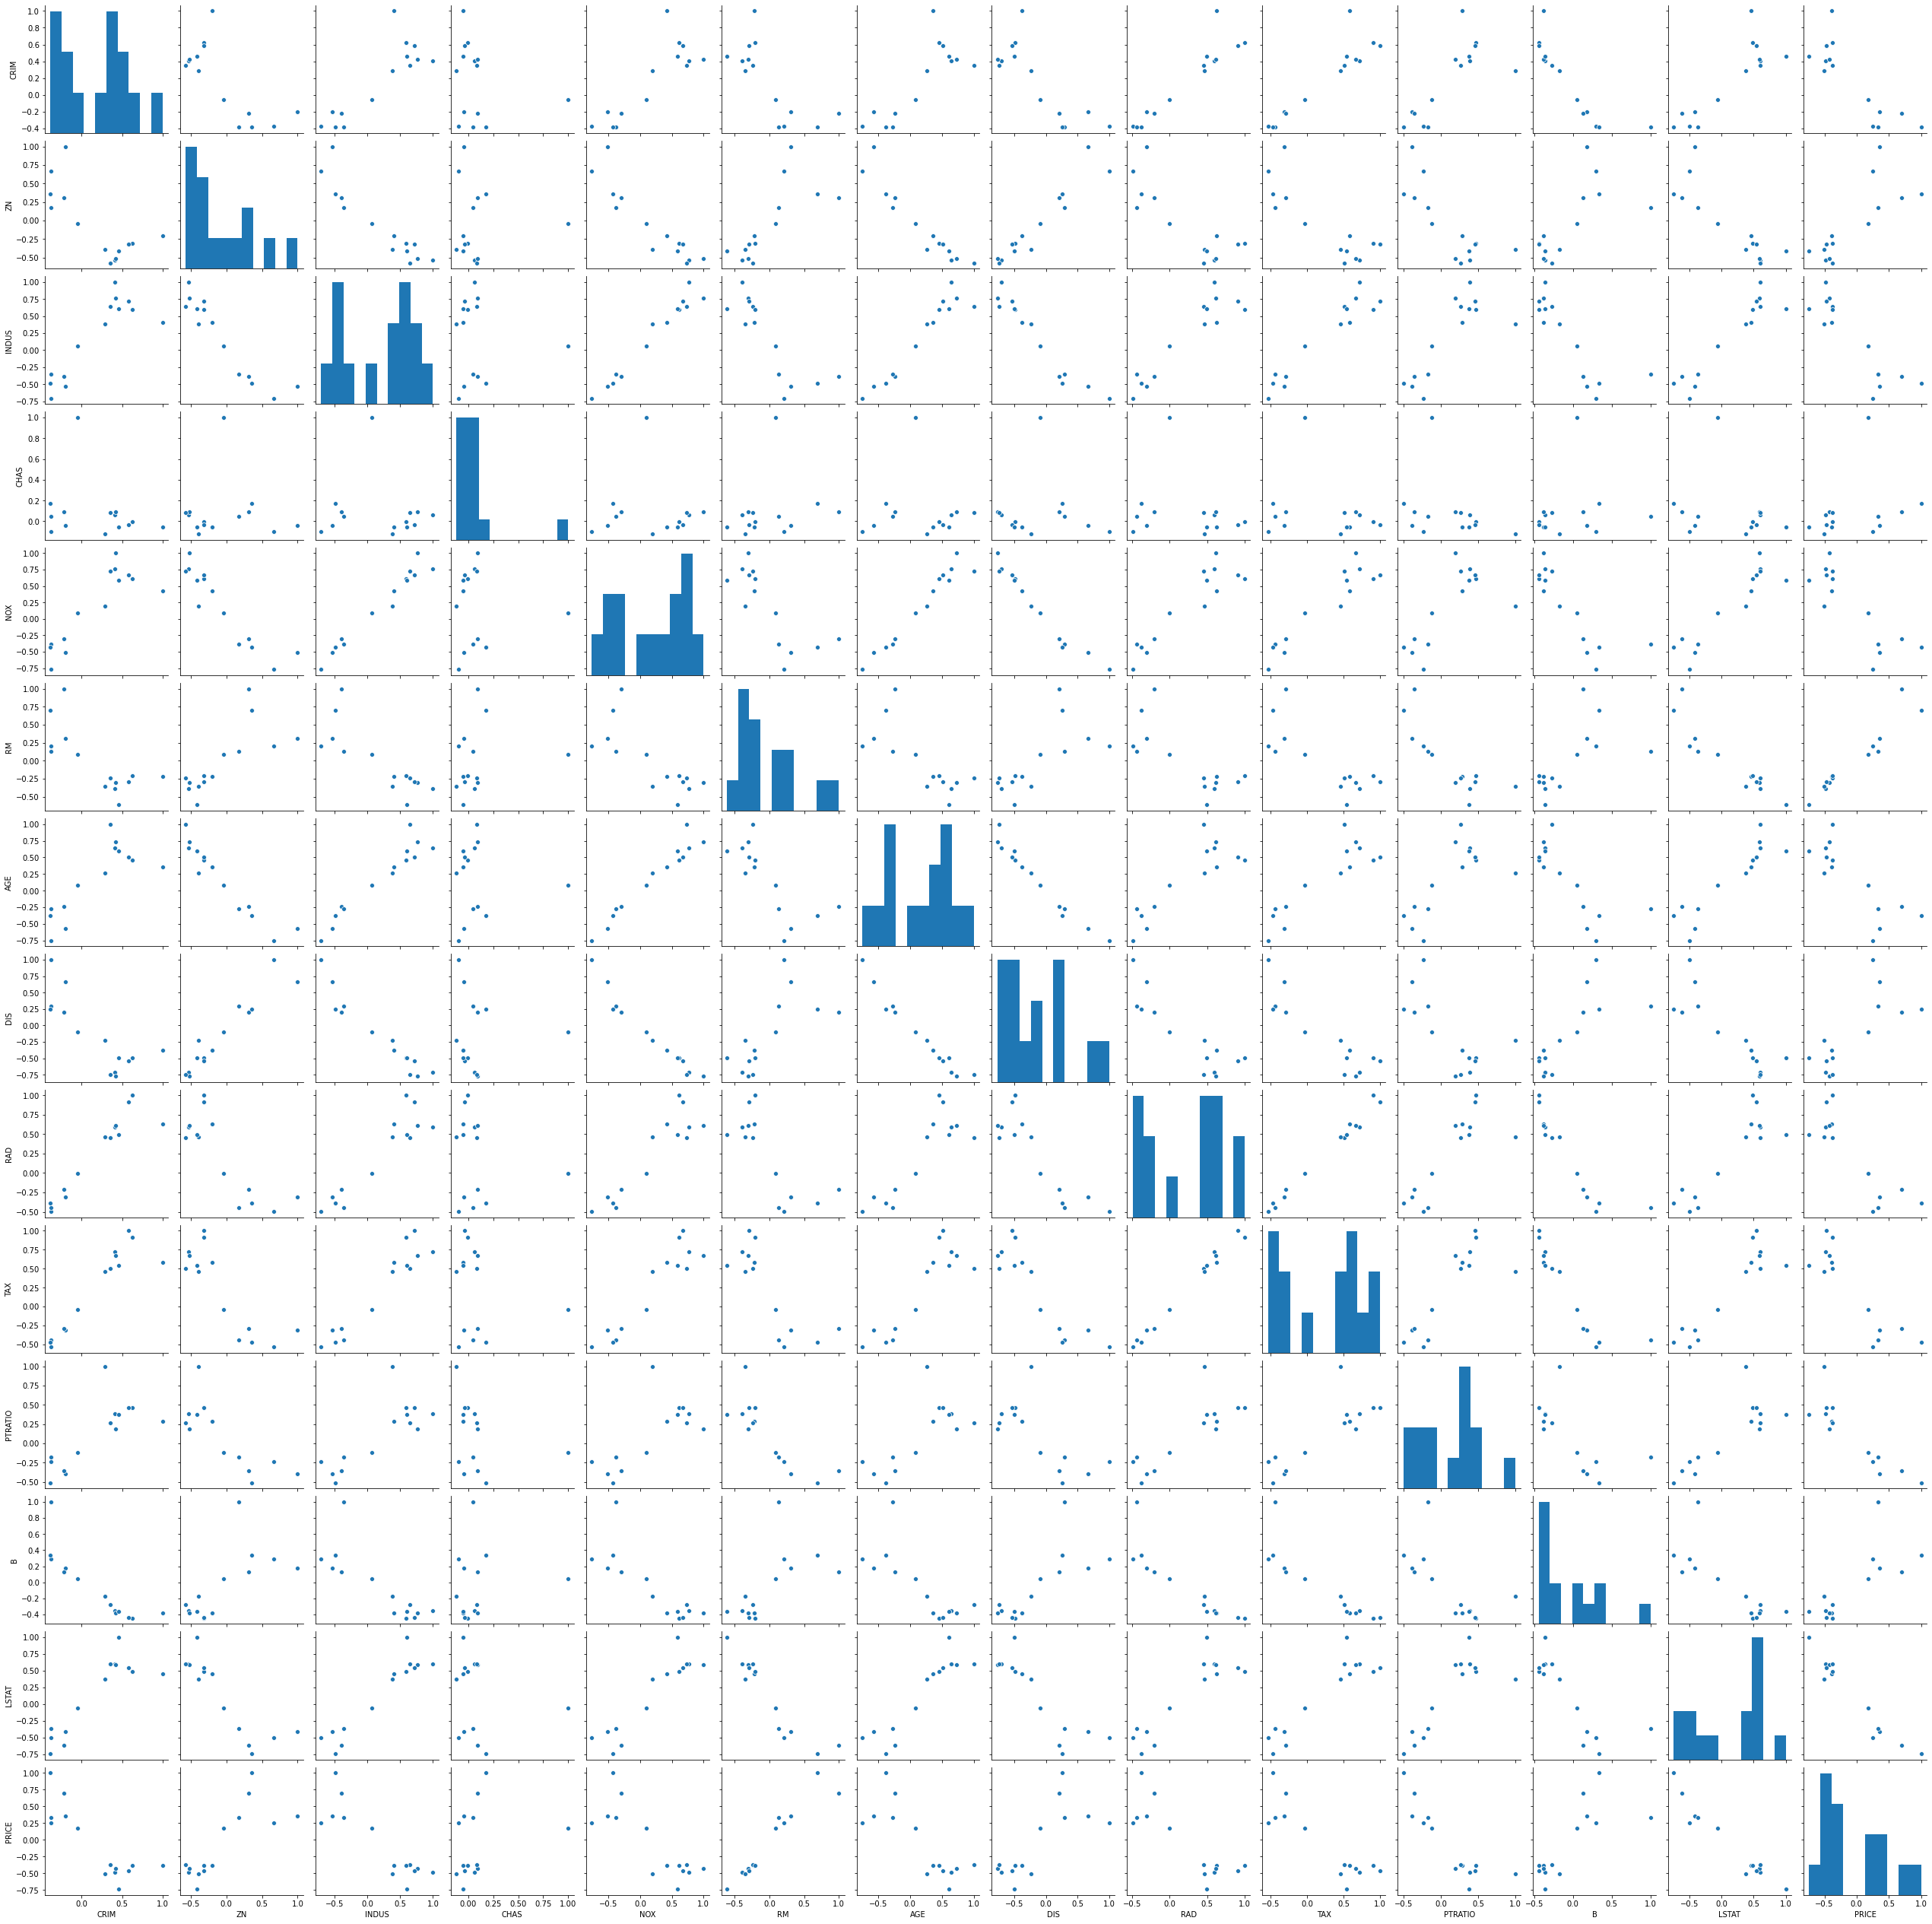

In [27]:
sns.pairplot(cor)

NameError: name 'data' is not defined

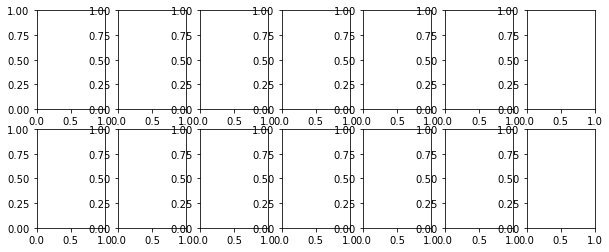

In [28]:
rows=2
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[columns[index]],ax=ax[i][j])
        index=index+1
        
        
